In [1]:
### Machine Problem Set 2
%pylab inline
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [2]:
### 1.) Temperature
### Calculate covariance between temp. at idx i and j
### t = 32-dim vector of temperatures
### i = index of first temperature
### j = index of second temperature
### if i==j, then this function returns the variance
def covTemps(t, i, j):
    return 36 / (1 + abs(i - j))

### a.)
### t = is a 32-dim vector of temperature values in Fahrenheit
### Calculate prob. that P[Y >= T] = 1 - P[Y <= T]
### In addition to calculating the probability, this function also returns the daily average temp. and its corresponding min. temp. for all 10000 samples. This is for answering letter b.
def julytemps(t):
    total_samples = 10000
    n = 31
    mu = 80 # E[Ti]
    var = 36 # From covariance formula, for all i=j
    mu = np.full(n, mu)
    var = np.full(n, var)
    temp13_10000 = np.zeros((total_samples, n)) # Initialize
    for i in range(0, total_samples):
        temp13_10000[i] = np.random.normal(mu, var, n)
    min_temperatures = temp13_10000.min(axis=1)
    daily_average_temp_samples = np.mean(temp13_10000, axis=1)
    daily_average_temp = daily_average_temp_samples
    daily_average_temp[daily_average_temp < t] = 0
    daily_average_temp[daily_average_temp >= t] = 1
    prob_daily_ave = daily_average_temp.sum() / daily_average_temp.size
    return prob_daily_ave, daily_average_temp_samples, min_temperatures

In [3]:
### Example prediction, t=80
prob_daily_ave, daily_average_temp_samples, min_temperatures = julytemps(80)
print("Probability of P[Y >= 80]: ", prob_daily_ave)
print(len(min_temperatures))

Probability of P[Y >= 80]:  0.5098
10000


In [4]:
### b.)
daily_average_temp_samples[daily_average_temp_samples <= 82] = 1
daily_average_temp_samples[daily_average_temp_samples > 82] = 0
min_temperatures[min_temperatures < 72] = 0
min_temperatures[min_temperatures >= 72] = 1
eventA_hit = 0
for idx in range(0, len(min_temperatures)):
    if daily_average_temp_samples[idx] == 1 and min_temperatures[idx] == 1:
        eventA_hit += 1
prob_event_A = eventA_hit / len(min_temperatures)
print("Probability of A = {Y <= 82, min Ti >= 72}: ", prob_event_A) ### Very little chance of this event to happen

Probability of A = {Y <= 82, min Ti >= 72}:  0.0


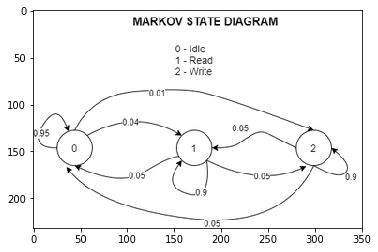

In [5]:
### 2.) Markov Chain
### a.) Construct Markov state diagram
image = mpimg.imread("MarkovChainMP2.png")
imgplot = plt.imshow(image)
plt.show()

In [13]:
### b.)
### Create state probabilities
p00 = 0.95
p01 = 0.04
p02 = 0.01
p10 = 0.05
p11 = 0.9
p12 = 0.05
p20 = 0.05
p21 = 0.05
p22 = 0.9
p_matrix = np.array([[p00, p01, p02],[p10, p11, p12],[p20, p21, p22]])

In [14]:
### Calculate n-step transition
def markovdisk(n):
    return np.linalg.matrix_power(p_matrix, n)

In [15]:
### P(10)
markovdisk(10)

array([[0.67433922, 0.22575728, 0.0999035 ],
       [0.32566078, 0.45299249, 0.22134673],
       [0.32566078, 0.25611808, 0.41822114]])

In [16]:
### P(100)
markovdisk(100)

array([[0.50001328, 0.29999733, 0.19998939],
       [0.49998672, 0.30000271, 0.20001057],
       [0.49998672, 0.30000262, 0.20001066]])

In [17]:
### P(1000)
markovdisk(1000)

array([[0.5, 0.3, 0.2],
       [0.5, 0.3, 0.2],
       [0.5, 0.3, 0.2]])